In [125]:
import netCDF4 as nc
import numpy as np
import scipy as sp
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy import feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [126]:
#specify where is the location of the data
Path_02 = "D:\\Climate_Tutorial\\ERA5 DATASET\\"
file_02 = xr.open_dataset(Path_02 + "pr_Amon_CESM2_ssp585_r4i1p1f1_gn_20150115-21001215_v20200528.nc")

In [127]:
file_02 

<xarray.Dataset>
Dimensions:    (lat: 21, lon: 33, nbnd: 2, time: 1032)
Coordinates:
  * lat        (lat) float64 0.4712 1.414 2.356 3.298 ... 17.43 18.38 19.32
  * lon        (lon) float64 -20.0 -18.75 -17.5 -16.25 ... 16.25 17.5 18.75 20.0
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (time, lat, nbnd) float64 ...
    lon_bnds   (time, lon, nbnd) float64 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   735110.0
    branch_time_in_parent:  735110.0
    case_id:                1735
    cesm_casename:          b.e21.BSSP585cmip6.f09_g17.CMIP6-SSP5-8.5.103
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2020-05-27T20:55:14Z
    data_specs_version:     01.00.31
    experim

In [128]:
# Define
long = file_02.variables["lon"]
long

<xarray.IndexVariable 'lon' (lon: 33)>
array([-20.  , -18.75, -17.5 , -16.25, -15.  , -13.75, -12.5 , -11.25, -10.  ,
        -8.75,  -7.5 ,  -6.25,  -5.  ,  -3.75,  -2.5 ,  -1.25,   0.  ,   1.25,
         2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,  10.  ,  11.25,  12.5 ,
        13.75,  15.  ,  16.25,  17.5 ,  18.75,  20.  ])
Attributes:
    axis:           X
    bounds:         lon_bnds
    standard_name:  longitude
    title:          Longitude
    type:           double
    units:          degrees_east
    valid_max:      360.0
    valid_min:      0.0

In [129]:
lat = file_02.variables["lat"]
lat

<xarray.IndexVariable 'lat' (lat: 21)>
array([ 0.471204,  1.413613,  2.356021,  3.298429,  4.240838,  5.183246,
        6.125654,  7.068063,  8.010471,  8.95288 ,  9.895288, 10.837696,
       11.780105, 12.722513, 13.664921, 14.60733 , 15.549738, 16.492147,
       17.434555, 18.376963, 19.319372])
Attributes:
    axis:           Y
    bounds:         lat_bnds
    standard_name:  latitude
    title:          Latitude
    type:           double
    units:          degrees_north
    valid_max:      90.0
    valid_min:      -90.0

In [130]:
# Select a certain long and lat data to display with the index method and convert to mm/day with (*86400)
pr = file_02.variables["pr"][0:13, -18:18]
pr = pr*86400
pr

<xarray.Variable (time: 13, lat: 15, lon: 33)>
array([[[6.749429e+00, 5.316828e+00, ..., 9.388525e-01, 6.895674e-01],
        [7.356905e+00, 4.721786e+00, ..., 5.105123e-01, 5.450081e-01],
        ...,
        [8.461583e-01, 8.265521e-01, ..., 2.086446e-02, 1.197630e-02],
        [5.503306e-01, 5.261597e-01, ..., 5.416601e-02, 2.753714e-02]],

       [[4.399963e+00, 3.820225e+00, ..., 6.316966e-01, 7.509073e-01],
        [2.695938e+00, 2.814022e+00, ..., 6.254336e-01, 6.450540e-01],
        ...,
        [3.038128e-01, 2.651051e-01, ..., 1.074390e-05, 6.366287e-07],
        [3.002698e-01, 3.318119e-01, ..., 3.824252e-07, 3.031477e-08]],

       ...,

       [[3.787008e+00, 3.807272e+00, ..., 1.573226e+00, 1.266500e+00],
        [3.628892e+00, 3.676938e+00, ..., 7.634000e-01, 7.632817e-01],
        ...,
        [2.383722e-01, 1.295866e-01, ..., 1.609307e-09, 1.459729e-09],
        [6.359116e-01, 3.931971e-01, ..., 3.771957e-09, 2.248086e-07]],

       [[6.992527e+00, 6.188712e+00, ..., 1

In [131]:
# Select a certain long and lat data to display with the select method and convert to mm/day with (*86400)
pr = file_02["pr"].sel(lat=np.arange(0,19,1),lon=np.arange(-20,20,1), method="nearest")
pr = file_02.variables["pr"][:]
pr = pr*86400
pr

<xarray.Variable (time: 1032, lat: 21, lon: 33)>
array([[[5.086107e+00, 5.187209e+00, ..., 3.563350e+00, 2.590129e+00],
        [5.274978e+00, 4.881868e+00, ..., 2.544644e+00, 1.997074e+00],
        ...,
        [1.256675e-01, 1.427308e-01, ..., 6.801501e-02, 6.608397e-02],
        [4.618290e-02, 5.042861e-02, ..., 4.816851e-02, 4.789377e-02]],

       [[4.217780e+00, 3.641979e+00, ..., 2.951171e+00, 2.747040e+00],
        [4.122398e+00, 3.939583e+00, ..., 2.184996e+00, 2.446800e+00],
        ...,
        [1.579768e-01, 3.177606e-01, ..., 1.815361e-03, 1.433238e-03],
        [1.169260e-01, 2.353576e-01, ..., 8.550871e-04, 2.563743e-03]],

       ...,

       [[4.448471e+00, 4.218024e+00, ..., 7.811518e+00, 5.798068e+00],
        [5.391063e+00, 5.208926e+00, ..., 7.096144e+00, 5.936745e+00],
        ...,
        [3.191798e-01, 5.623574e-01, ..., 1.242087e-07, 2.651017e-07],
        [1.308765e-01, 3.761233e-01, ..., 1.819554e-08, 3.222610e-08]],

       [[4.895537e+00, 5.232000e+00, ...,

In [132]:
pptn = pptn*86400
long = file_02.variables["lon"]
lat = file_02.variables["lat"]
pptn = file_02.variables["pr"][:]
pptn2 = file_02["pr"].sel(lat=np.arange(0,19,1), method = "nearest")

In [133]:
pptn2

<xarray.DataArray 'pr' (time: 1032, lat: 19, lon: 33)>
[647064 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 0.4712 1.414 2.356 3.298 ... 14.61 15.55 17.43 18.38
  * lon      (lon) float64 -20.0 -18.75 -17.5 -16.25 ... 16.25 17.5 18.75 20.0
  * time     (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        chunits( ((1000 * PRECT)), units="kg m-2 s-1")
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      mon
    id:             pr
    long_name:      Precipitation
    mipTable:       Amon
    out_name:       pr
    prov:           Amon ((isd.003))
    realm:          atmos
    standard_name:  precipitation_flux
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          kg m-2 s-1
    variable_id:    pr

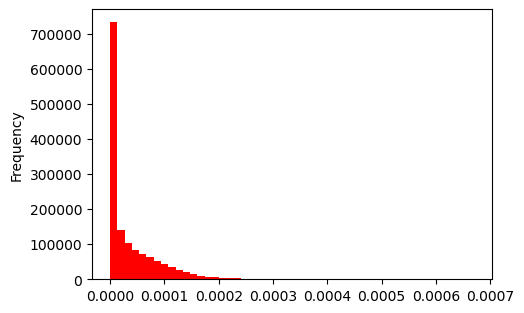

In [135]:
fig = plt.figure(figsize=(5,3), dpi=100)
ax = fig.add_axes([0.1,0.1,0.8,0.9])

file_03 = file_02.to_dataframe()
file_03.pr.plot(kind = "hist", bins = 50, color = "red")


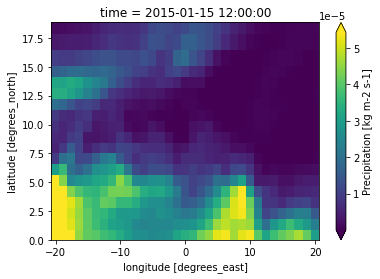

In [111]:
pptn2.isel(time=0).plot(robust=True)